In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split



In [16]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback


In [1]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
id = "1kQa7ncnwrP373_eumpV0fWnCubjFkH6b"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('final_Queens.csv')

In [7]:
df=pd.read_csv('final_Queens.csv')

In [10]:
df1=df[['avg price','grocery distance < 500 numbers','subway_line_number < 500m',
        'hospital_distance','library_distance','mall1_dist','police_dist',
        'small_park_distance','mid_park_distance','big_park_distance',
        'elem_school_dist','high_school_dist','junior_high_school_dist','secondary_school_dist',
       'college_dist','bank_dist','restaurants1_dist','cafes1_dist']]
df1=df1.rename(columns={"avg price":"avg_price"})
df1=df1.dropna()

In [11]:
df1.loc[((df1.avg_price < 240) | (df1.avg_price > 200)), 'price_level'] = 'low'
df1.loc[((df1.avg_price < 400) | (df1.avg_price > 240)), 'price_level'] = 'median'
df1.loc[((df1.avg_price < 700) | (df1.avg_price > 400)), 'price_level'] = 'high'
df1.loc[((df1.avg_price > 700)), 'price_level'] = 'veryhigh'

In [12]:
y=df1.loc[:,"avg_price"]
X=df1.iloc[:,1:-1]

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [21]:
def get_model ():
    model = Sequential([
        Dense(10, input_shape=(17,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])
    
    model.compile(
        loss = 'mse',
        optimizer = 'adam'
    )
    
    return model


get_model().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                180       
                                                                 
 dense_17 (Dense)            (None, 20)                220       
                                                                 
 dense_18 (Dense)            (None, 5)                 105       
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [22]:
es_cb = EarlyStopping(monitor='val_loss', patience=17)

model = get_model()

preds_on_untrained = model.predict(X_test)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 50,
    callbacks = [es_cb]
    
)

Epoch 1/50
44/44 [==============================] - 1s 6ms/step - loss: 224962.9844 - val_loss: 103897.6094
Epoch 2/50
44/44 [==============================] - 0s 4ms/step - loss: 70055.4375 - val_loss: 72030.5156
Epoch 3/50
44/44 [==============================] - 0s 4ms/step - loss: 46560.1836 - val_loss: 53862.4531
Epoch 4/50
44/44 [==============================] - 0s 3ms/step - loss: 33223.8750 - val_loss: 44466.1680
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 26995.8535 - val_loss: 39950.7461
Epoch 6/50
44/44 [==============================] - 0s 4ms/step - loss: 24975.4023 - val_loss: 38917.8711
Epoch 7/50
44/44 [==============================] - 0s 4ms/step - loss: 24298.7949 - val_loss: 38438.4883
Epoch 8/50
44/44 [==============================] - 0s 4ms/step - loss: 23520.6602 - val_loss: 37419.1406
Epoch 9/50
44/44 [==============================] - 0s 3ms/step - loss: 23116.6953 - val_loss: 37352.1875
Epoch 10/50
44/44 [=========================

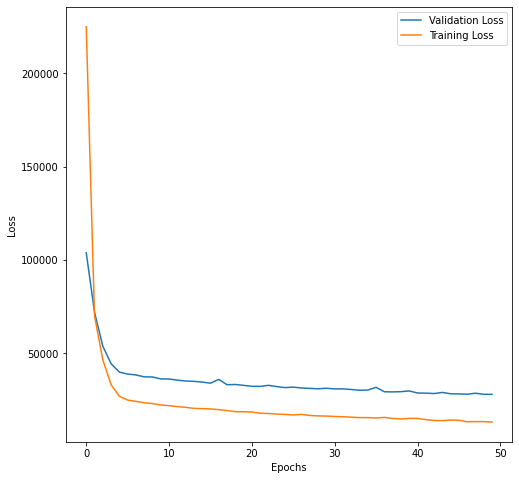

In [23]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

plot_loss(history)

In [29]:
mse = mean_squared_error(y_test, model.predict(X_test))
print('Mean Squared Error: ',mse)
mae = mean_absolute_error(y_test, model.predict(X_test))
print('Mean Absolute Error: ',mae)
rsq = r2_score(y_train, model.predict(X_train)) #R-Squared on the training data
print('R-square, Training: ',rsq)
rsq = r2_score(y_test, model.predict(X_test)) #R-Squared on the testing data
print('R-square, Testing: ',rsq)

Mean Squared Error:  28044.60524274896
Mean Absolute Error:  96.28485925389859
R-square, Training:  0.2309130559899777
R-square, Testing:  -0.01504863195289019


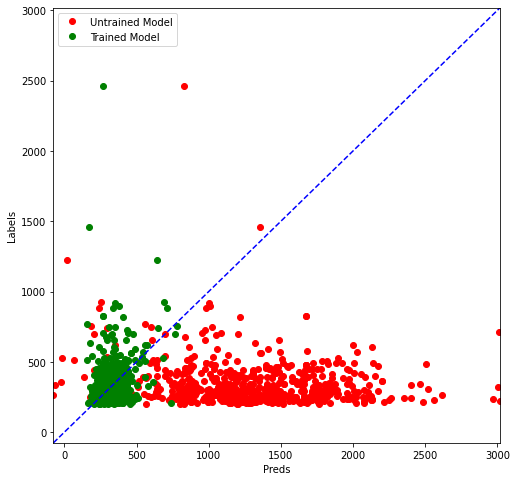

In [24]:
preds_on_trained = model.predict(X_test)


def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

In [25]:
price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained = [convert_label_value(y) for y in preds_on_trained]
prince_test = [convert_label_value(y) for y in y_test]

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

compare_predictions(price_untrained, price_trained, prince_test)

NameError: ignored